In [19]:
%pip install qutip

/local/environments/default/default-venv/lib64/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/local/environments/default/default-venv/lib64/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/local/environments/default/default-venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [38]:
from qutip import *
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

First we generate the density matrices for the coherent, thermal and fock states.

In [23]:
N = 20

rho_coherent = coherent_dm(N, np.sqrt(2))

rho_thermal = thermal_dm(N, 2)

rho_fock = fock_dm(N, 2)

Next, we plot histograms of the diagonals of the density matrices:

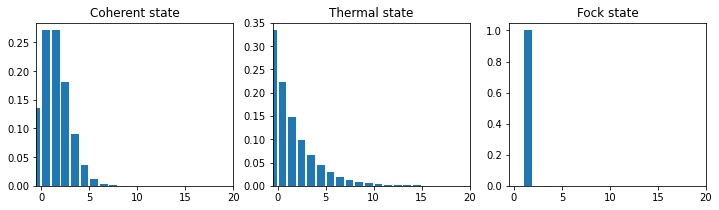

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

bar0 = axes[0].bar(np.arange(0, N)-.5, rho_coherent.diag())

lbl0 = axes[0].set_title("Coherent state")

lim0 = axes[0].set_xlim([-.5, N])

bar1 = axes[1].bar(np.arange(0, N)-.5, rho_thermal.diag())

lbl1 = axes[1].set_title("Thermal state")

lim1 = axes[1].set_xlim([-.5, N])

bar2 = axes[2].bar(np.arange(0, N)-.5, rho_fock.diag())

lbl2 = axes[2].set_title("Fock state")

lim2 = axes[2].set_xlim([-.5, N])

plt.show()

One frequently need to visualize the Fock-distribution in the way described above, so QuTiP provides a convenience function for doing this, see qutip.visualization.plot_fock_distribution, and the following example:

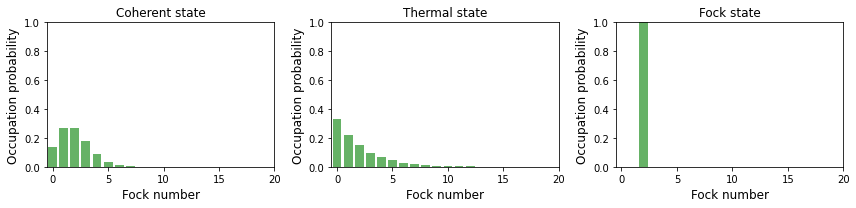

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

plot_fock_distribution(rho_coherent, fig=fig, ax=axes[0], title="Coherent state");

plot_fock_distribution(rho_thermal, fig=fig, ax=axes[1], title="Thermal state");

plot_fock_distribution(rho_fock, fig=fig, ax=axes[2], title="Fock state");

fig.tight_layout()

plt.show()

In QuTiP, the Wigner function for a harmonic mode can be calculated with the function qutip.wigner.wigner. It takes a ket or a density matrix as input, together with arrays that define the ranges of the phase-space coordinates (in the x-y plane). In the following example the Wigner functions are calculated and plotted for the same three states as in the previous section.

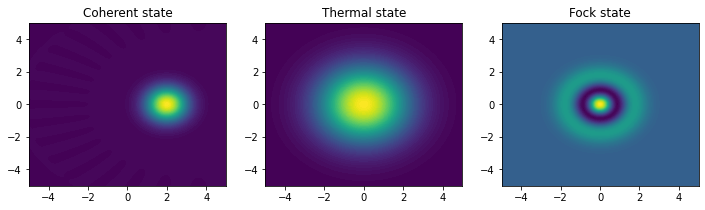

In [26]:
xvec = np.linspace(-5,5,200)

W_coherent = wigner(rho_coherent, xvec, xvec)

W_thermal = wigner(rho_thermal, xvec, xvec)

W_fock = wigner(rho_fock, xvec, xvec)

# plot the results

fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)

lbl0 = axes[0].set_title("Coherent state")

cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100)

lbl1 = axes[1].set_title("Thermal state")

cont0 = axes[2].contourf(xvec, xvec, W_fock, 100)

lbl2 = axes[2].set_title("Fock state")

plt.show()

Now let's try construct a superposition of vacuum and coherent states to then calculate the Wigner function on the combined state, expected to not be linear with respect to the individual Wigner functions of each of its components.

In [35]:
vac = basis(5,0)
fock1 = basis(5,1)
ket = (vac+ fock1).unit()
print(ket)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]]


In [36]:
W_vac = wigner(vac, xvec, xvec)
W_fock1 = wigner(fock1, xvec, xvec)

W_ket= wigner(ket, xvec, xvec)

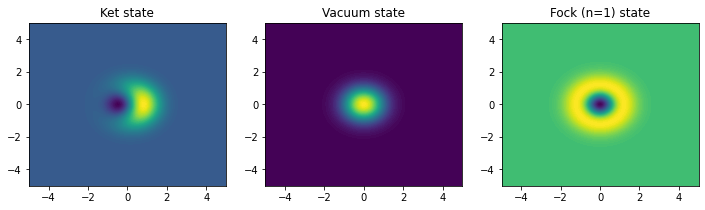

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_ket, 100)

lbl0 = axes[0].set_title("Ket state")

cont1 = axes[1].contourf(xvec, xvec, W_vac, 100)

lbl1 = axes[1].set_title("Vacuum state")

cont0 = axes[2].contourf(xvec, xvec, W_fock1, 100)

lbl2 = axes[2].set_title("Fock (n=1) state")

plt.savefig('SuperpositionWigner.png')

plt.show()

In [46]:
W_ketsum = W_vac+W_fock1

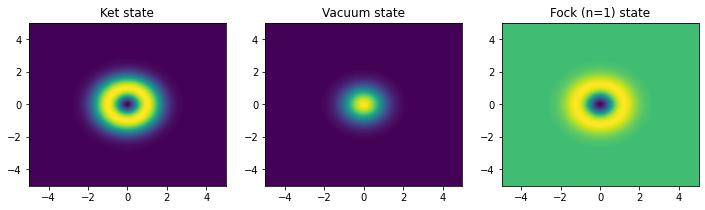

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_ketsum, 100)

lbl0 = axes[0].set_title("Ket state")

cont1 = axes[1].contourf(xvec, xvec, W_vac, 100)

lbl1 = axes[1].set_title("Vacuum state")

cont0 = axes[2].contourf(xvec, xvec, W_fock1, 100)

lbl2 = axes[2].set_title("Fock (n=1) state")

plt.savefig('SumofWigner.png')

plt.show()

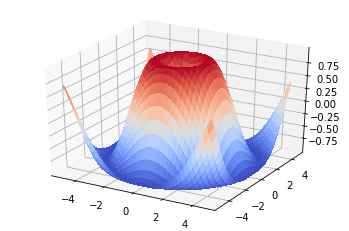

In [45]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)